In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
from datetime import timedelta
import datetime as dt
import time
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer

In [3]:
# Import data
df = pd.read_excel('C:/Users/saika/Desktop/online_retail_II.xlsx')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:

df.dropna(inplace = True)
df['Description']=df['Description'].str.strip()
df['Country']=df['Country'].str.strip()

In [6]:
# Creating New Columnn
total = df['Quantity'] * df['Price']
df = df.assign(total=total.values)
df.head()
DF1 = df.copy()

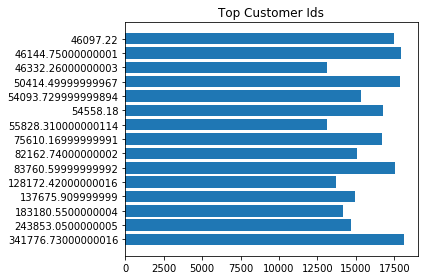

In [7]:

# Group by customer to find top customers :
group  = df.groupby(['Customer ID']).sum()['total'].sort_values(ascending=False)
group_top = pd.DataFrame(group.head(15))
group_top.reset_index(level=0, inplace=True)
group_top.sort_values('Customer ID', ascending=False)
y_axis = np.arange(15)

x_values =x=group_top['Customer ID']
y_values=group_top['total']
plt.barh(y_axis, x_values, align='center')
plt.title('Top Customer Ids')


plt.yticks(y_axis, y_values)
plt.tight_layout()

In [8]:
group.describe()

count      4383.000000
mean       1904.679118
std        8519.369281
min      -25111.090000
25%         285.260000
50%         655.940000
75%        1645.690000
max      341776.730000
Name: total, dtype: float64

In [9]:
df_group = df.groupby('Customer ID')
df_cluster=pd.DataFrame(columns=['Quantity','Price', 'total', 'Customer ID'])
count=0
df_group.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
524732,538145,22224,WHITE LOVEBIRD LANTERN,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70
524734,538145,22168,ORGANISER WOOD ANTIQUE WHITE,2,2010-12-09 16:08:00,8.50,15211.0,United Kingdom,17.00
524735,538145,21781,MA CAMPAGNE CUTLERY BOX,1,2010-12-09 16:08:00,14.95,15211.0,United Kingdom,14.95


In [10]:
for k,v in (df_group):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['Price'].sum(), v['total'].sum(), k]
    count+=1

# Applying K-Means Clustering Algorithm to quantity, and total spend
X = df_cluster.iloc[:, [0, 2]].values

In [11]:
df_cluster.head()

,Quantity,Price,total,Customer ID
0,52.0,578.36,-64.68,12346.0
1,828.0,162.95,1323.32,12347.0
2,373.0,14.39,222.16,12348.0
3,988.0,899.49,2646.99,12349.0
4,261.0,49.46,300.93,12351.0


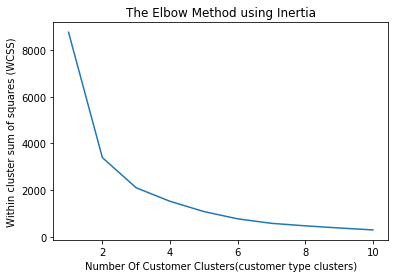

In [12]:

# Feature Scaling

sc_X = StandardScaler()
X= sc_X.fit_transform(X)
#Using the Elbow method to find the optimum number of clusters

wcss = [] #Within cluster sum of squares (inertia)

# https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422
#n_clusters is no.of clusters given by this method,
#k-means++ is an random initialization methods for centriods to avoid random initialisation trap,
#max_iter is max no of iterations defined when k-means is running
#n_init is no of times k-means will run with different initial centroids

for i in range(1,11): #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('Within cluster sum of squares (WCSS)')
plt.show()

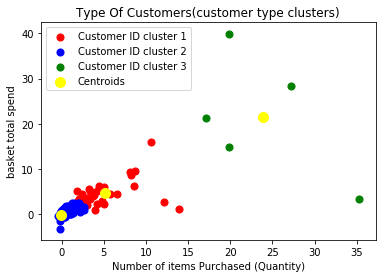

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer ID cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer ID cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer ID cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('basket total spend')
plt.legend()
plt.show()

ML to predict Customer's Country is UK or Not

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [15]:
print(df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
total                 float64
dtype: object


In [16]:
df['Country'] = np.where(df['Country'] =='United Kingdom' , 1, 0)

In [17]:
df['Country'].value_counts()

1    379423
0     38111
Name: Country, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_columns = [ "Invoice","StockCode","Description", "Country"]
df[cat_columns].apply(lambda col: col.astype('category'))
    # add it to our new dataframe
label_encoders = {}
for col in cat_columns:
  print("Encoding {}".format(col))
  new_le = LabelEncoder()
  df[col] = pd.factorize(df[col])[0]
  df[col] = new_le.fit_transform(df[col])
  label_encoders[col] = new_le  
df.head(10)

Encoding Invoice
Encoding StockCode
Encoding Description
Encoding Country


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total
0,0,0,0,12,2009-12-01 07:45:00,6.95,13085.0,0,83.4
1,0,1,1,12,2009-12-01 07:45:00,6.75,13085.0,0,81.0
2,0,2,2,12,2009-12-01 07:45:00,6.75,13085.0,0,81.0
3,0,3,3,48,2009-12-01 07:45:00,2.10,13085.0,0,100.8
4,0,4,4,24,2009-12-01 07:45:00,1.25,13085.0,0,30.0
5,0,5,5,24,2009-12-01 07:45:00,1.65,13085.0,0,39.6
6,0,6,6,24,2009-12-01 07:45:00,1.25,13085.0,0,30.0
7,0,7,7,10,2009-12-01 07:45:00,5.95,13085.0,0,59.5
8,1,8,8,12,2009-12-01 07:46:00,2.55,13085.0,0,30.6
9,1,9,9,12,2009-12-01 07:46:00,3.75,13085.0,0,45.0


In [19]:
df["Create Time"]= pd.to_datetime(df['InvoiceDate'])
df['time_hour'] = df['Create Time'].apply(lambda x: x.hour)

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total,Create Time,time_hour
0,0,0,0,12,2009-12-01 07:45:00,6.95,13085.0,0,83.4,2009-12-01 07:45:00,7
1,0,1,1,12,2009-12-01 07:45:00,6.75,13085.0,0,81.0,2009-12-01 07:45:00,7
2,0,2,2,12,2009-12-01 07:45:00,6.75,13085.0,0,81.0,2009-12-01 07:45:00,7
3,0,3,3,48,2009-12-01 07:45:00,2.10,13085.0,0,100.8,2009-12-01 07:45:00,7
4,0,4,4,24,2009-12-01 07:45:00,1.25,13085.0,0,30.0,2009-12-01 07:45:00,7


In [21]:
df.corr()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,total,time_hour
Invoice,1.000000,0.245485,0.329027,-0.012204,-0.003400,0.021334,0.009241,-0.005845,0.018477
StockCode,0.245485,1.000000,0.852079,-0.008728,-0.000798,0.003210,0.019069,-0.006612,0.004012
Description,0.329027,0.852079,1.000000,-0.010464,-0.001475,-0.002703,0.027444,-0.001541,0.001449
Quantity,-0.012204,-0.008728,-0.010464,1.000000,-0.004112,-0.011577,0.040751,0.321783,-0.018066
Price,-0.003400,-0.000798,-0.001475,-0.004112,1.000000,-0.003266,0.010393,-0.381450,0.000879
Customer ID,0.021334,0.003210,-0.002703,-0.011577,-0.003266,1.000000,-0.374114,-0.009475,0.058780
Country,0.009241,0.019069,0.027444,0.040751,0.010393,-0.374114,1.000000,0.045582,-0.092517
total,-0.005845,-0.006612,-0.001541,0.321783,-0.381450,-0.009475,0.045582,1.000000,-0.034656
time_hour,0.018477,0.004012,0.001449,-0.018066,0.000879,0.058780,-0.092517,-0.034656,1.000000


In [22]:
UK = df[df["Country"] == 0]
NotUk = df[df["Country"] != 0]

In [23]:
UK1 = UK.sample(n= 38111)
train_df = pd.concat([UK1, NotUk]).sample(frac=1)
train_df['Country'].value_counts()

1    38111
0    38111
Name: Country, dtype: int64

In [24]:
x = train_df.drop(['Create Time', 'Quantity', 'Price', 'Customer ID', 'time_hour', 'InvoiceDate', 'Country'], axis =1)
y= train_df['Country']
y.value_counts()

1    38111
0    38111
Name: Country, dtype: int64

In [25]:
scaler = Normalizer().fit(x)
x1 = scaler.transform(x)



In [26]:
scoring = 'accuracy'
num_folds = 7
seed =np.random.seed
validation_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size = 0.2
                                                    ,random_state = 0)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(60977, 4) (60977,)
(15245, 4) (15245,)


In [27]:
print(x.dtypes)

Invoice          int64
StockCode        int64
Description      int64
total          float64
dtype: object


In [28]:
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 LR : 0.536055 (0.006520)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 LDA : 0.533562 (0.006104)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 KNN : 0.602686 (0.002046)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 CART : 0.610115 (0.003847)
 NB : 0.512931 (0.005809)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 SVM : 0.523082 (0.004311)


In [29]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
#LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: 0.540400 (0.006682)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: 0.617774 (0.003558)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.611017 (0.001748)
ScaledNB: 0.512931 (0.005809)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledSVM: 0.554225 (0.004916)


In [30]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))




0.5597900951131518
[[6324 1261]
 [5450 2210]]
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      7585
           1       0.64      0.29      0.40      7660

    accuracy                           0.56     15245
   macro avg       0.59      0.56      0.53     15245
weighted avg       0.59      0.56      0.52     15245



In [31]:
# boosting
boost = []
boost.append(('AB', AdaBoostClassifier()))
boost.append(('GBM', GradientBoostingClassifier()))
boost.append(('RF', RandomForestClassifier()))
boost.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in boost:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.640455 (0.005219)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.648212 (0.002069)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.637929 (0.004252)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 0.627892 (0.001541)


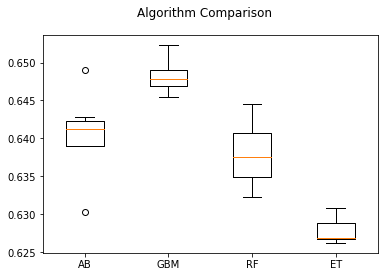

In [32]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
